# ML01

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [5]:
df.sample(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
109502,55172890,2014-05-29 15:37:00.00000092,57.33,2014-05-29 15:37:00 UTC,-73.966405,40.792392,-73.782850,40.643982,1
142066,33056496,2010-06-25 20:19:00.000000177,5.70,2010-06-25 20:19:00 UTC,-73.995673,40.723297,-73.987665,40.719675,3
93973,46081522,2015-06-18 22:50:07.0000006,24.00,2015-06-18 22:50:07 UTC,-73.968224,40.762310,-74.015961,40.704990,1
185903,7080575,2013-03-14 14:38:28.0000004,9.50,2013-03-14 14:38:28 UTC,-73.974008,40.764740,-73.976955,40.749974,1
60859,39192215,2012-12-08 01:33:00.000000151,5.00,2012-12-08 01:33:00 UTC,-73.993955,40.761517,-73.995712,40.755640,6


In [6]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [7]:
df.shape

(200000, 9)

In [8]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [9]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [10]:
df.dropna(inplace = True)

In [11]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [12]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [13]:
df.drop(columns=['Unnamed: 0'], axis=1)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
199995,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [14]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

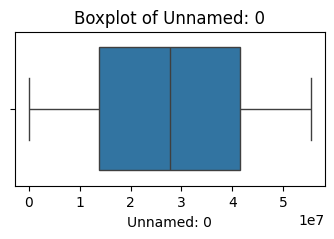

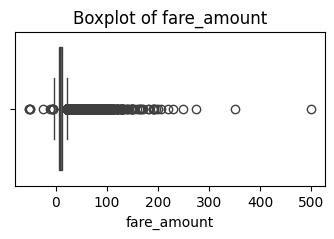

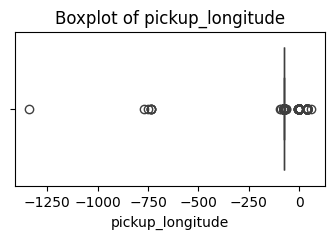

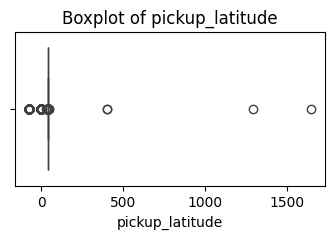

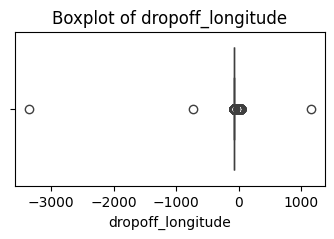

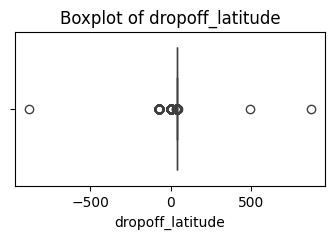

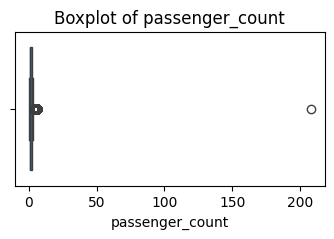

In [15]:
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [16]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [17]:
df.shape

(199999, 9)

In [18]:
df = df[df['fare_amount'] > 0]
df.shape

(199977, 9)

In [19]:
df = df[
    (df['passenger_count'] > 0) & (df['passenger_count'] <=6)
]
df.shape

(199268, 9)

In [20]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_datetime']

0        2015-05-07 19:52:06+00:00
1        2009-07-17 20:04:56+00:00
2        2009-08-24 21:45:00+00:00
3        2009-06-26 08:22:21+00:00
4        2014-08-28 17:47:00+00:00
                    ...           
199995   2012-10-28 10:49:00+00:00
199996   2014-03-14 01:09:00+00:00
199997   2009-06-29 00:42:00+00:00
199998   2015-05-20 14:56:25+00:00
199999   2010-05-15 04:08:00+00:00
Name: pickup_datetime, Length: 199268, dtype: datetime64[ns, UTC]

In [21]:
df['pickup_hr'] = df['pickup_datetime'].dt.hour

In [22]:
df['pickup_day'] = df['pickup_datetime'].dt.dayofweek

In [23]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'pickup_hr', 'pickup_day'],
      dtype='object')

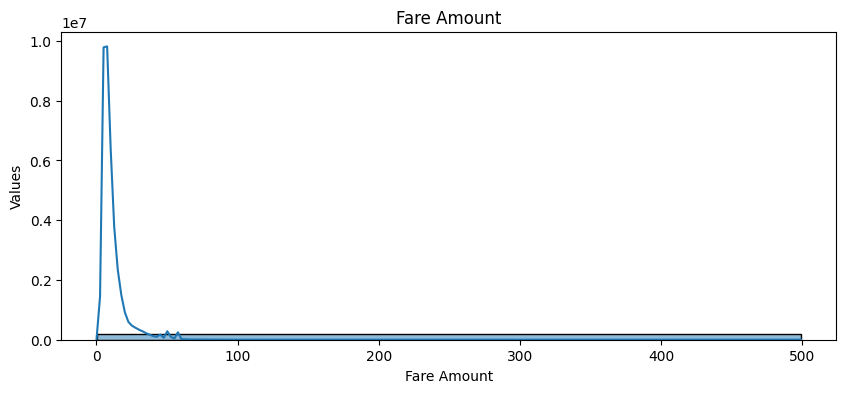

In [24]:
plt.figure(figsize=(10,4))
sns.histplot(df['fare_amount'], bins=1, kde=True)
plt.title('Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Values')
plt.show()

# OUTLIERS

<Axes: xlabel='fare_amount'>

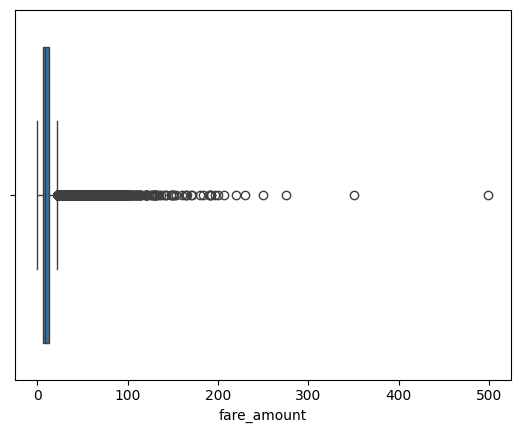

In [25]:
sns.boxplot(x=df['fare_amount'])

In [26]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lb = Q1 - 1.5*IQR
ub = Q3 + 1.5*IQR
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"LB: {lb}")
print(f"UB: {ub}")

old_rows = df.shape[0]
print(f"Old Rows : {old_rows}")

df = df[(df['fare_amount'] >= lb) & (df['fare_amount'] <= ub)]
print(f"New Rows {df.shape[0]}")

Q1: 6.0
Q3: 12.5
IQR: 6.5
LB: -3.75
UB: 22.25
Old Rows : 199268
New Rows 182147


<Axes: xlabel='fare_amount'>

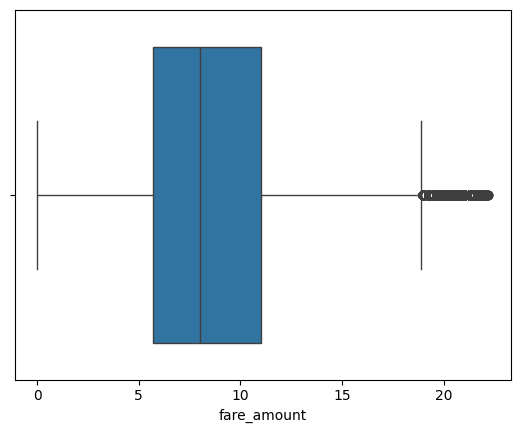

In [27]:
sns.boxplot(x=df['fare_amount'])

In [28]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'pickup_hr', 'pickup_day'],
      dtype='object')

In [29]:
cor_mat = df[['fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'pickup_hr', 'pickup_day']].corr()

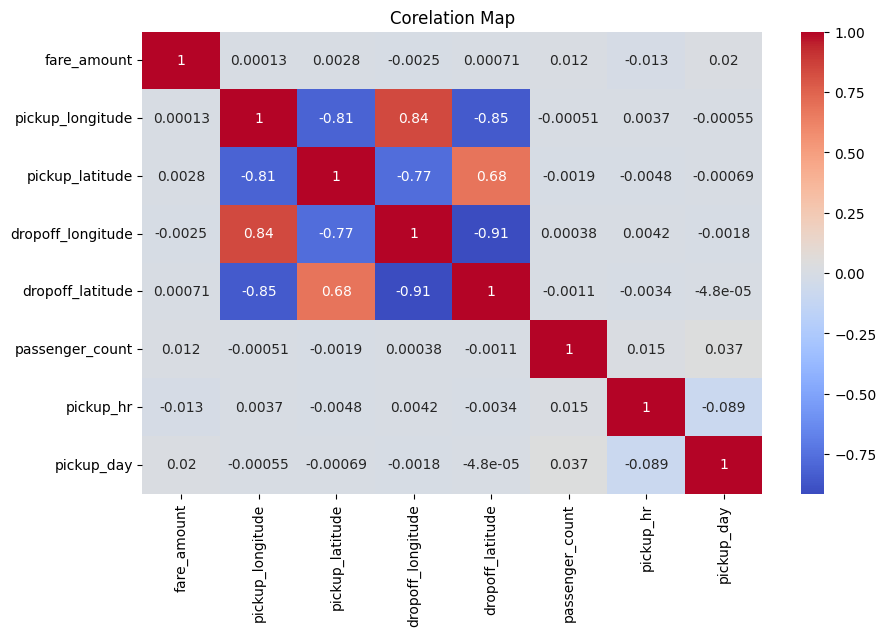

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm')
plt.title('Corelation Map')
plt.show()

# DATA CLEANING

In [31]:
df.shape

(182147, 11)

In [32]:
df = df[
(df['pickup_latitude'].between(-90,90)) & 
(df['pickup_longitude'].between(-180,180)) & 
(df['dropoff_latitude'].between(-90,90)) & 
(df['dropoff_longitude'].between(-180,180))
]

In [33]:
df.shape

(182136, 11)

In [34]:
from geopy.distance import geodesic
df['distance'] = df.apply(lambda row:
             geodesic(
                 (row['pickup_latitude'], row['pickup_longitude']),
                 (row['dropoff_latitude'], row['dropoff_longitude'])
             ).km,axis=1
        )

In [35]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'pickup_hr', 'pickup_day',
       'distance'],
      dtype='object')

In [36]:
x  = df[['distance', 'passenger_count', 'pickup_hr', 'pickup_day']]
y  = df['fare_amount']

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [39]:
linear = LinearRegression()

In [40]:
rf = RandomForestRegressor()

In [41]:
linear.fit(x_train, y_train)

LinearRegression()

In [42]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [43]:
y_pred_linear = linear.predict(x_test)

In [44]:
y_pred_rf = rf.predict(x_test)

In [45]:
from sklearn.metrics import (
    r2_score as r2, 
    mean_squared_error as mse, 
    root_mean_squared_error as rmse
)

In [46]:
# r2, mse, rmse

In [47]:
r2_linear = r2(y_test, y_pred_linear)
r2_rf = r2(y_test, y_pred_rf)

In [48]:
mse_linear = mse(y_test, y_pred_linear)
mse_rf = mse(y_test, y_pred_rf)

In [49]:
rmse_linear = rmse(y_test, y_pred_linear)
rmse_rf = rmse(y_test, y_pred_rf)

In [50]:
# Print Evaluation Metrics in a structured format
print("\nModel Evaluation Metrics")
print("-" * 30)
print("Linear Regression:")
print(f"  R² Score       : {r2_linear:.4f}")
print(f"  MSE Score       : {mse_linear:.4f}")
print(f"  RMSE           : {rmse_linear:.4f}\n")

print("Random Forest Regression:")
print(f"  R² Score       : {r2_rf:.4f}")
print(f"  MSE Score       : {mse_rf:.4f}")
print(f"  RMSE           : {rmse_rf:.4f}\n")


Model Evaluation Metrics
------------------------------
Linear Regression:
  R² Score       : 0.0004
  MSE Score       : 17.0242
  RMSE           : 4.1260

Random Forest Regression:
  R² Score       : 0.6333
  MSE Score       : 6.2455
  RMSE           : 2.4991



In [51]:
imp = rf.feature_importances_
features = x.columns

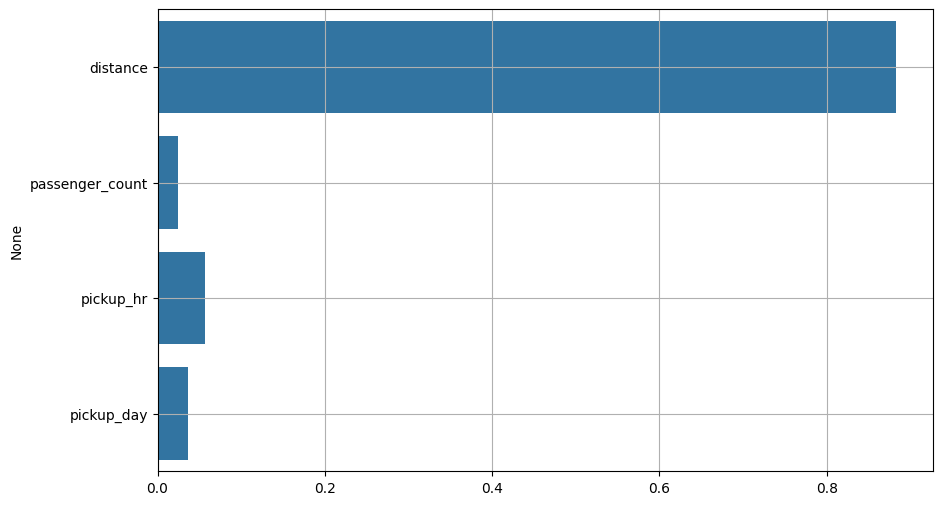

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(x=imp, y=features)
plt.grid()
plt.show()

Here’s a comprehensive overview of the key concepts and procedures related to predicting Uber ride prices using machine learning, particularly focusing on pre-processing the dataset, identifying outliers, checking correlations, and implementing linear regression and random forest regression models.

### 1. Dataset Overview
- **Uber Fare Dataset**: Contains data regarding Uber rides, including pickup and drop-off locations, fare amount, and passenger count.
- **Columns**:
  - `fare_amount`: The price charged for the ride.
  - `pickup_datetime`: Date and time of the ride pickup.
  - `pickup_longitude`, `pickup_latitude`: Coordinates of the pickup location.
  - `dropoff_longitude`, `dropoff_latitude`: Coordinates of the drop-off location.
  - `passenger_count`: Number of passengers in the ride.

### 2. Pre-processing the Dataset
- **Loading the Data**: Use `pandas` to read the dataset and inspect it with functions like `info()`, `describe()`, and `sample()`.
- **Handling Missing Values**: Check for null values with `isnull().sum()`, and remove or impute as necessary.
  - In the provided code, `dropna()` is used to remove any rows with missing values.
- **Data Cleaning**: 
  - Remove irrelevant columns (e.g., `Unnamed: 0`).
  - Filter out unrealistic or erroneous values, such as negative fare amounts and out-of-bound passenger counts.

### 3. Identifying Outliers
- **Boxplots**: Visualize data distribution and identify outliers using `boxplot`.
- **Interquartile Range (IQR)**:
  - Calculate Q1 (25th percentile) and Q3 (75th percentile).
  - Compute IQR: \( \text{IQR} = Q3 - Q1 \)
  - Determine lower bound (LB) and upper bound (UB) for detecting outliers:
    - \( \text{LB} = Q1 - 1.5 \times \text{IQR} \)
    - \( \text{UB} = Q3 + 1.5 \times \text{IQR} \)
  - Remove outliers based on these bounds.

### 4. Checking Correlation
- **Correlation Matrix**: 
  - Use `corr()` to compute pairwise correlations between numerical features.
  - Visualize using a heatmap with `seaborn` to identify strong correlations between features (e.g., distance, passenger count, and fare amount).

### 5. Feature Engineering
- **Date-Time Features**:
  - Extract useful information from `pickup_datetime`, such as hour of the day and day of the week.
- **Distance Calculation**:
  - Calculate the distance between pickup and drop-off locations using the Haversine formula or geodesic distance, which can influence the fare.

### 6. Implementing Regression Models
- **Train-Test Split**: Split the dataset into training and testing sets using `train_test_split`.
  
#### Linear Regression
- **Model Training**: Fit a linear regression model using `LinearRegression()`.
- **Model Prediction**: Make predictions on the test set.

#### Random Forest Regression
- **Model Training**: Fit a random forest regression model using `RandomForestRegressor()`.
- **Model Prediction**: Make predictions on the test set.

### 7. Model Evaluation
- **Evaluation Metrics**:
  - **R² Score**: Indicates the proportion of variance in the dependent variable predictable from the independent variables. Ranges from 0 to 1.
  - **Mean Squared Error (MSE)**: Average of the squares of the errors—difference between predicted and actual values. Lower values are better.
  - **Root Mean Squared Error (RMSE)**: Square root of MSE; provides error in the same units as the output variable.
  
```python
from sklearn.metrics import (
    r2_score as r2, 
    mean_squared_error as mse, 
    mean_absolute_error as mae
)
```

- **Print Results**: Present R², MSE, and RMSE for both models in a structured format for easy comparison.

### 8. Feature Importance (Random Forest)
- **Feature Importance Visualization**: 
  - Use the `feature_importances_` attribute of the random forest model to evaluate the importance of different features in predicting fare.
  
```python
import matplotlib.pyplot as plt
import seaborn as sns

imp = rf.feature_importances_
features = x.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=imp, y=features)
plt.grid()
plt.show()
```

### Conclusion
This analysis encompasses the entire process of predicting Uber ride prices using regression models, from data preprocessing and cleaning to model implementation and evaluation. The choice of model (linear regression vs. random forest) and the performance metrics used allow for a comprehensive understanding of the predictive capabilities based on the provided dataset. 

### Key Takeaways
- Data preprocessing is crucial for accurate predictions.
- Understanding feature relationships through correlation analysis can guide feature selection.
- Evaluating models with appropriate metrics helps in choosing the best predictive approach.

You used the `geodesic` function from the `geopy.distance` module to calculate the distance between the pickup and drop-off locations in your Uber fare prediction dataset. Here’s a breakdown of why this step is important and how it contributes to your analysis:

### Purpose of Calculating Distance
1. **Relevance to Fare Calculation**:
   - The fare for an Uber ride is often influenced by the distance traveled. By calculating the geodesic distance between the pickup and drop-off points, you create a feature that can significantly improve the accuracy of your fare prediction model.

2. **Geospatial Accuracy**:
   - The `geodesic` function computes the shortest path between two points on the Earth’s surface based on their geographical coordinates (latitude and longitude). This provides a more accurate measure of distance than simple Euclidean distance calculations, especially over longer distances or in cases where the Earth’s curvature is significant.

3. **Feature Engineering**:
   - The computed distance becomes a new feature in your dataset (`df['distance']`). This feature can be used as an independent variable in your regression models, allowing them to learn how distance correlates with the fare amount.

### How It Works
- **Lambda Function**: The use of `apply()` along with a `lambda` function iterates over each row of the DataFrame. For each row:
  - It extracts the pickup and drop-off latitude and longitude.
  - It calculates the geodesic distance using the `geodesic()` function.
  - The distance is expressed in kilometers (km) and is stored in a new column called `'distance'`.

### Example of the Process
Here’s a simplified breakdown of how this process works:
1. **Row Access**: For each row in the DataFrame, you access:
   - `pickup_latitude`, `pickup_longitude`
   - `dropoff_latitude`, `dropoff_longitude`

2. **Distance Calculation**: Using the `geodesic` function:
   ```python
   geodesic((pickup_latitude, pickup_longitude), (dropoff_latitude, dropoff_longitude)).km
   ```

3. **Storing the Result**: The resulting distance is then assigned to the `'distance'` column for that specific row.

### Conclusion
Calculating the distance between pickup and drop-off locations is a crucial step in preparing your data for regression modeling in the Uber fare prediction task. This feature enhances the model’s ability to predict fares based on one of the most significant factors affecting ride pricing: the distance traveled.

### Linear Model (Linear Regression)

#### Definition:
- A **linear regression model** is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to observed data.

#### Key Features:
1. **Equation**: The model assumes a linear relationship:
   \[
   y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon
   \]
   - \(y\): Dependent variable (target).
   - \(x_i\): Independent variables (features).
   - \(\beta_i\): Coefficients representing the weight of each feature.
   - \(\epsilon\): Error term (residuals).

2. **Assumptions**:
   - **Linearity**: The relationship between dependent and independent variables is linear.
   - **Independence**: Observations are independent of each other.
   - **Homoscedasticity**: Constant variance of the errors.
   - **Normality**: Errors are normally distributed.

3. **Interpretation**:
   - Each coefficient (\(\beta\)) indicates the expected change in the dependent variable for a one-unit increase in the respective independent variable, holding all other variables constant.

4. **Use Cases**:
   - Simple linear regression (one independent variable) and multiple linear regression (multiple independent variables).
   - Commonly used for predictions and trend analysis in various fields.

5. **Evaluation Metrics**:
   - **R² Score**: Represents the proportion of variance explained by the model.
   - **Mean Squared Error (MSE)**: Average of the squares of the errors (difference between predicted and actual values).
   - **Root Mean Squared Error (RMSE)**: Square root of MSE, providing an error metric in the same units as the target variable.

### Random Forest (Random Forest Regression)

#### Definition:
- **Random Forest** is an ensemble learning method that combines multiple decision trees to improve predictive accuracy and control overfitting. It can be used for both classification and regression tasks.

#### Key Features:
1. **Ensemble Learning**:
   - It constructs multiple decision trees during training and merges their outputs (predictions) for a more accurate and robust model.
   - Each tree is trained on a random subset of the data (bootstrap sampling) and uses a random subset of features for splitting nodes.

2. **How It Works**:
   - Each tree in the forest makes an independent prediction. For regression tasks, the final prediction is typically the average of all tree predictions.
   - For classification tasks, the final prediction is based on the majority vote among the trees.

3. **Advantages**:
   - **Robustness**: Less prone to overfitting than individual decision trees, especially when dealing with high-dimensional data.
   - **Flexibility**: Can handle both numerical and categorical features, and it can model complex relationships.

4. **Feature Importance**:
   - Random Forest provides a measure of feature importance, indicating which features contribute the most to the model’s predictions. This is useful for feature selection and understanding the model.

5. **Evaluation Metrics**:
   - Similar to linear regression, using metrics like R², RMSE, and Mean Absolute Error (MAE) to assess performance.

### Comparison
| Feature                    | Linear Regression                 | Random Forest                   |
|----------------------------|-----------------------------------|---------------------------------|
| Model Type                 | Parametric (linear model)        | Non-parametric (ensemble model) |
| Complexity                  | Simpler and faster                | More complex and slower         |
| Overfitting Risk           | Higher if assumptions are violated| Lower due to ensemble approach   |
| Interpretability           | More interpretable (coefficients) | Less interpretable (black box)  |
| Handling of Non-linearity  | Limited to linear relationships    | Can model complex non-linear relationships |
| Feature Importance         | Not directly available            | Feature importance scores provided |

### Summary
- **Linear Regression** is suitable for simpler problems where the relationship between variables is linear and easy to interpret.
- **Random Forest** is preferable for more complex datasets, especially when dealing with interactions and non-linear relationships, providing robustness against overfitting and better predictive power.